In [1]:
%matplotlib inline
from math import pi
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import Aer
from qiskit.providers.aer import unitary_simulator
backend = Aer.get_backend('unitary_simulator')
simulator = Aer.get_backend('qasm_simulator')
statevector= Aer.get_backend('statevector_simulator')
%config InlineBackend.figure_format = 'svg' # Makes the images look nice



In [14]:
def bell_state(qc,a,b):      #bell state creation
    qc.h(a)
    qc.cx(a,b)
def alice_encode(qc,qubit,msg):   #encode message msg by alice on qubit=qubit
    if msg=='00':
        pass
    elif msg=='01':
        qc.z(qubit)
    elif msg=='10':
        qc.x(qubit)
    elif msg=='11':
        qc.z(qubit)
        qc.x(qubit)
def decode_message(qc,a,b):
    qc.cx(a,b)
    qc.h(a)

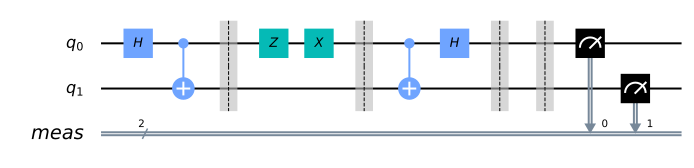

In [18]:
qc= QuantumCircuit(2)
bell_state(qc,0,1)
qc.barrier()
msg='11'
alice_encode(qc,0,msg)
qc.barrier()

decode_message(qc,0,1)
qc.barrier()
qc.measure_all()
qc.draw(output='mpl')

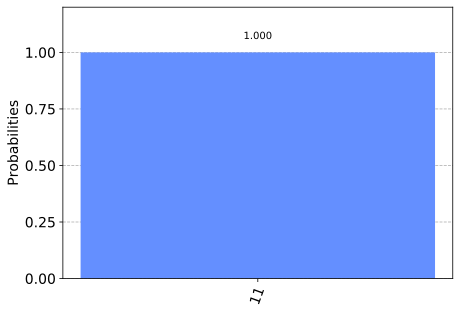

In [19]:
counts=execute(qc,simulator,shots=1000).result().get_counts(qc)    # simulator = Aer.get_backend('qasm_simulator')
plot_histogram(counts)

In [ ]:
#on quantum computer(Copied qiskit textbook)
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 512

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)


ibmqfactory.load_account:WARNING:2020-05-11 10:53:44,917: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


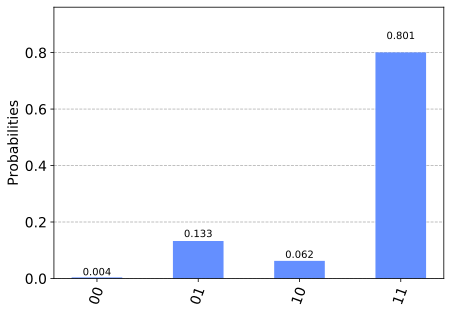

In [22]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts(qc))

In [28]:
correct_results = result.get_counts(qc)[msg]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 80.08%
